In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results.csv")

In [3]:
cx = pd.read_csv("contexts.csv")

In [4]:
df = df.drop(["source", "is_filler"], axis = 1)
df.head()

,participant,cs,word,group,contexts
0,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,243 244
1,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,245 246
2,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,248 249 247
3,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,250 252
4,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,256 251 254


In [5]:
d = dict(zip(cx.id,cx.derivation)) #dictionary with key - stimulusID : value - derivation

In [6]:
d_sent = dict(zip(cx.id,cx.text))

In [7]:
def context_split(basket):
    basket_split =  [word.split() for word in basket]
    new_basket = [[int(stimulus) for stimulus in stimuli] for stimuli in basket_split]
    return new_basket

df.contexts = context_split(df.contexts)

In [8]:
df.head(2) # now column context is a list of integers, not a string 

,participant,cs,word,group,contexts
0,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,"[243, 244]"
1,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,"[245, 246]"


In [9]:
cx.head()

,id,cs,derivation,text
0,1,1,metonymy,У него были маленькие злые глазки.
1,9,2,homonym1,Повышение по службе дало надежды на карьерный ...
2,18,3,literal,В этом году английский у нас преподает нервна...
3,25,4,homonym1,Наша задача ― посеять на лугах и пастбищах нов...
4,32,5,literal,"В ходе расследования выяснилось, что водитель ..."


In [10]:
labels = [[d[stimulus] for stimulus in stimuli] for stimuli in df.contexts]

In [11]:
pd_labels = pd.Series(labels)

In [12]:
df["labels"] = pd_labels

Одна строка = одна корзина. В колонке labels теперь лежат значения тех стимулов, которые человек положил в одну корзину 

In [14]:
df.labels = [[sense.strip() for sense in senses] for senses in df.labels]

In [15]:
df.head(20) 

,participant,cs,word,group,contexts,labels
0,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,"[243, 244]","[literal, literal]"
1,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,"[245, 246]","[metonymy_1, metonymy_1]"
2,277a058c-6372-4840-8b1d-2ac2bac3d5e1,36,наглый,close_close_meton,"[248, 249, 247]","[metonymy_2, metonymy_2, metonymy_2]"
3,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,"[250, 252]","[metonymy_1, metonymy_1]"
4,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,"[256, 251, 254]","[metonymy_2, literal, literal]"
5,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,"[253, 255]","[metonymy_2, metonymy_2]"
6,277a058c-6372-4840-8b1d-2ac2bac3d5e1,37,внимательный,close_close_meton,[257],[metonymy_2]
7,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,close_meton,"[40, 39]","[literal, literal]"
8,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,close_meton,"[42, 43]","[metaphor, metaphor]"
9,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,close_meton,"[41, 44]","[metonymy, metonymy]"


In [16]:
arr = []
for basket in df.labels:
    if (len(basket)>1 and (len(set(basket))==1)):
        arr.append("pure") # "чистые" корзины, где все слова одного класса 
    elif len(basket) == 1:
        arr.append("one stimulus") # корзины в которых лежит только один стимул
    else:
        arr.append("mixed") #смешанные корзины, в которые попали слова из разных классов 

In [17]:
df["basket_type"] = arr

In [ ]:
df.to_csv('Preprocessing1402.csv')

## Корзины, в которых лежит только один стимул

Посмотрим какие контексты чаще всего оказываются одинокими в корзине. Для этого отбираем в датафрейме все строки где basket_type == "one stimulus". Создаем частотный словарь, гдe ключ - id-контекста, значение - кол-во раз, когда этот контекст оказывался один в своей корзине отдельно от других.

In [159]:
onestim = df[df.basket_type =="one stimulus"]
onestim_cont_d = {}
for cont in onestim.contexts:
    if cont[0] not in onestim_cont_d:
        onestim_cont_d[cont[0]] = 1
    else: 
        onestim_cont_d[cont[0]] += 1

In [180]:
conts = [cont[0] for cont in onestim.contexts]
groups = [group for group in onestim.group]
groups_d = dict(zip(conts, groups))

In [183]:
words_d = dict(zip(conts, [word for word in onestim.word]))

In [164]:
loneliest_stimuli = dict(sorted(onestim_cont_d.items() , key=lambda t : t[1] , reverse=True))

In [169]:
loneliest_stimuli = pd.DataFrame(list(loneliest_stimuli.items()), columns=['id_context', 'frequency'])

In [172]:
deriv = []
for num in loneliest_stimuli.id_context: 
    if num in d:
        deriv.append(d[num])

In [174]:
loneliest_stimuli["derivation"] = deriv

In [181]:
group_column = []
for num in loneliest_stimuli.id_context: 
    if num in groups_d:
        group_column.append(groups_d[num])
loneliest_stimuli["group"] = group_column

In [186]:
word_column = []
for num in loneliest_stimuli.id_context: 
    if num in words_d:
        word_column.append(words_d[num])
loneliest_stimuli["word"] = word_column

In [187]:
sent_column = []
for num in loneliest_stimuli.id_context: 
    if num in d_sent:
        sent_column.append(d_sent[num])
loneliest_stimuli["text"] = sent_column

In [191]:
loneliest_stimuli.head(3)

,id_context,frequency,derivation,group,word,text
0,132,197,metaphor,far_meton,сахарный,Сахарная улыбка придавала лицу невинное выраже...
1,130,148,metonymy,far_meton,сахарный,При сахарном диабете отвар 10 г на 150 мл воды...
2,112,120,metonymy,far_meton,живой,"Чувство, что ты приник к своей почве. Будто ис..."


In [190]:
loneliest_stimuli.to_csv('1basket_1stimulus.csv')

Text(0.5,1,'Cтимулы, которые чаще всего сортировали в отдельную корзину')

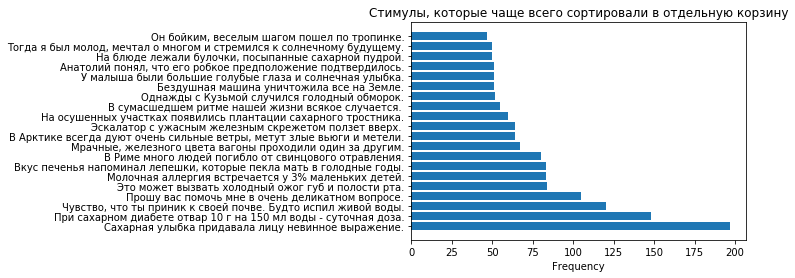

In [207]:
plt.barh(loneliest_stimuli.text[0:20], loneliest_stimuli.frequency[0:20])
plt.xlabel('Frequency')
plt.title('Cтимулы, которые чаще всего сортировали в отдельную корзину')

In [230]:
cm1 = loneliest_stimuli[loneliest_stimuli.group=="close_meton"]
ccm1 = loneliest_stimuli[loneliest_stimuli.group=="close_close_meton"]
cfm1 = loneliest_stimuli[loneliest_stimuli.group=="close_far_meton"]
fm1 = loneliest_stimuli[loneliest_stimuli.group=="far_meton"]

Text(0.5,1,'Cтимулы, которые чаще всего сортировали в отдельную корзину (far_meton)')

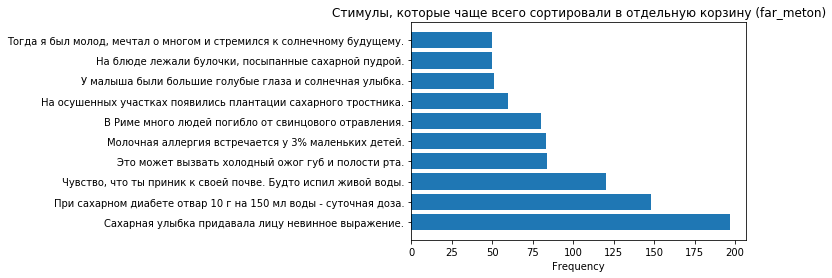

In [237]:
plt.barh(fm1.text[0:10], fm1.frequency[0:10])
plt.xlabel('Frequency')
plt.title('Cтимулы, которые чаще всего сортировали в отдельную корзину (far_meton)')

## "Смешанные" корзины 

In [19]:
mixed = df[df.basket_type =="mixed"]

In [57]:
close_meton = mixed[mixed.group=="close_meton"]
close_close_meton = mixed[mixed.group=="close_close_meton"]
close_far_meton = mixed[mixed.group=="close_far_meton"]
far_meton = mixed[mixed.group=="far_meton"]

In [58]:
close_far_meton.shape[0] 

2810

### close_meton

In [21]:
def df_manipulations(df):
    d_df = dict(zip([word for word in df.word], [label for label in df.labels]))
    df = df.drop(["basket_type", "group"], axis = 1)
    df["basket_length"] = [len(basket) for basket in df.labels]
    df["basket_set"] = [" ".join(set(basket)) for basket in df.labels]
    return df

In [22]:
close_meton = df_manipulations(close_meton)
close_meton.head()

,participant,cs,word,contexts,labels,basket_length,basket_set
44,98f0eb92-84a5-4a90-91e7-19d5ce1f7c69,3,крикливый,"[18, 19, 21, 22, 24]","[literal, metonymy, literal, metonymy, literal]",5,metonymy literal
53,98f0eb92-84a5-4a90-91e7-19d5ce1f7c69,11,деликатный,"[74, 76, 78, 79]","[metonymy, literal, literal, literal]",4,metonymy literal
58,8cb2bbe8-7546-4bfd-86ab-c183ee89e5ff,8,бездушный,"[57, 58, 53, 55]","[literal, literal, metonymy, metonymy]",4,metonymy literal
61,8cb2bbe8-7546-4bfd-86ab-c183ee89e5ff,7,умный,"[45, 47, 48, 51, 52]","[metonymy, metaphor, metaphor, metonymy, meton...",5,metonymy metaphor
77,31208ef9-ccc2-430b-8396-31f49099b749,3,крикливый,"[18, 19, 21, 22, 24]","[literal, metonymy, literal, metonymy, literal]",5,metonymy literal


In [23]:
cm_count = close_meton.basket_set.groupby(close_meton.basket_set).count()

In [27]:
cm_count

basket_set
literal metaphor               61
metaphor literal               69
metonymy literal             1333
metonymy literal metaphor      88
metonymy metaphor             619
metonymy metaphor literal     143
Name: basket_set, dtype: int64

In [24]:
cm_series = close_meton.basket_set.value_counts()

In [25]:
cm_summary = pd.DataFrame(cm_series)

In [28]:
cm_summary.loc["literal meton metaph"] = cm_summary.loc["metonymy literal metaphor"]+ cm_summary.loc["metonymy metaphor literal"]

In [29]:
cm_summary.loc["literal metaph"] = cm_summary.loc["literal metaphor"]+ cm_summary.loc["metaphor literal"]

In [30]:
cm_summary = cm_summary.drop(["literal metaphor", "metaphor literal", "metonymy literal metaphor", "metonymy metaphor literal"])

In [31]:
cm_summary['names'] = cm_summary.index

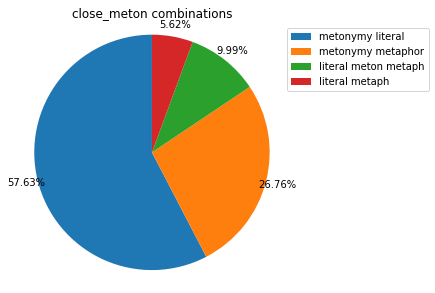

In [34]:
#cm_summary.plot.pie(y='basket_set', figsize=(5, 5))
plt.pie(
    cm_summary['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1., #labeldistance=1.2
)
plt.axis('equal')
plt.legend(cm_summary['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_meton combinations', fontsize=12)
plt.show()

In [35]:
cm_summary

,basket_set,names
metonymy literal,1333,metonymy literal
metonymy metaphor,619,metonymy metaphor
literal meton metaph,231,literal meton metaph
literal metaph,130,literal metaph


### close_close_meton 

In [352]:
close_close_meton = df_manipulations(close_close_meton)

In [354]:
ccm_count = close_close_meton.basket_set.groupby(close_close_meton.basket_set).count()

In [358]:
ccm = pd.DataFrame(ccm_count)
ccm['names'] = ccm.index

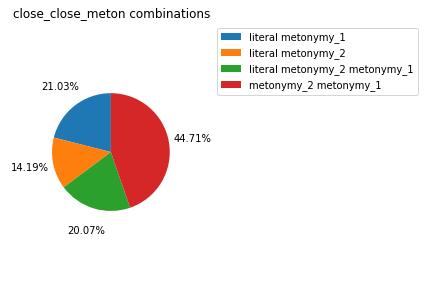

In [373]:
plt.pie(
    ccm['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.4, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(ccm['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_close_meton combinations', fontsize=12)
plt.show()

### close_far_meton

In [37]:
close_far_meton = df_manipulations(close_far_meton)

In [40]:
cfm_count = close_far_meton.basket_set.groupby(close_far_meton.basket_set).count()

In [41]:
cfm_count

basket_set
literal metonymy_c               407
literal metonymy_c metonymy_f    264
literal metonymy_f               291
metonymy_c literal               373
metonymy_c literal metonymy_f    217
metonymy_c metonymy_f            579
metonymy_f literal               168
metonymy_f metonymy_c            412
metonymy_f metonymy_c literal     99
Name: basket_set, dtype: int64

In [44]:
cfm_series = close_far_meton.basket_set.value_counts()

In [46]:
cfm_summary = pd.DataFrame(cfm_series)

In [47]:
cfm_summary.loc["literal meton_c meton_f"] = cfm_summary.loc["literal metonymy_c metonymy_f"]+ cfm_summary.loc["metonymy_c literal metonymy_f"]+ cfm_summary.loc["metonymy_f metonymy_c literal"]

In [48]:
cfm_summary.loc["literal meton_c"] = cfm_summary.loc["literal metonymy_c"]+cfm_summary.loc["metonymy_c literal"]

In [49]:
cfm_summary.loc["literal meton_f"] = cfm_summary.loc["literal metonymy_f"]+cfm_summary.loc["metonymy_f literal"]

In [50]:
cfm_summary.loc["meton_f meton_c"] = cfm_summary.loc["metonymy_f metonymy_c"]+cfm_summary.loc["metonymy_c metonymy_f"]

In [51]:
cfm_summary = cfm_summary.drop(["metonymy_f metonymy_c literal", "metonymy_c literal metonymy_f", 
                              "literal metonymy_c metonymy_f", "literal metonymy_c","literal metonymy_f",
                                "metonymy_c literal","metonymy_c metonymy_f", "metonymy_f literal",
                                "metonymy_f metonymy_c"])

In [52]:
cfm_summary['names'] = cfm_summary.index

In [53]:
cfm_summary

,basket_set,names
literal meton_c meton_f,580,literal meton_c meton_f
literal meton_c,780,literal meton_c
literal meton_f,459,literal meton_f
meton_f meton_c,991,meton_f meton_c


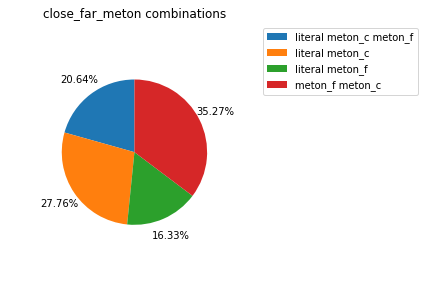

In [56]:
plt.pie(
    cfm_summary['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.25, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(cfm_summary['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_far_meton combinations', fontsize=12)
plt.show()

### far_meton

In [59]:
far_meton = df_manipulations(far_meton)
far_meton.head()

,participant,cs,word,contexts,labels,basket_length,basket_set
57,8cb2bbe8-7546-4bfd-86ab-c183ee89e5ff,13,сонный,"[89, 91, 92, 93]","[metonymy, metaphor, metaphor, metonymy]",4,metonymy metaphor
70,31208ef9-ccc2-430b-8396-31f49099b749,23,солнечный,"[144, 145, 147, 149, 150]","[metonymy, metonymy, literal, literal, literal]",5,metonymy literal
75,31208ef9-ccc2-430b-8396-31f49099b749,20,сахарный,"[130, 131, 133]","[metonymy, literal, literal]",3,metonymy literal
89,65198011-1ade-4194-a77b-59dd176d449f,13,сонный,"[89, 91, 93]","[metonymy, metaphor, metonymy]",3,metonymy metaphor
90,65198011-1ade-4194-a77b-59dd176d449f,13,сонный,"[88, 90, 92, 94]","[literal, literal, metaphor, literal]",4,literal metaphor


In [60]:
fm_count = far_meton.basket_set.groupby(far_meton.basket_set).count()

In [61]:
fm_count

basket_set
literal metaphor               69
metaphor literal               83
metonymy literal             1207
metonymy literal metaphor      56
metonymy metaphor             518
metonymy metaphor literal      62
Name: basket_set, dtype: int64

In [62]:
fm_series = far_meton.basket_set.value_counts()

In [63]:
fm_summary = pd.DataFrame(fm_series)

In [64]:
fm_summary.loc["literal metaph"] = fm_summary.loc["literal metaphor"]+fm_summary.loc["metaphor literal"]

In [65]:
fm_summary.loc["literal meton metaph"] = fm_summary.loc["metonymy literal metaphor"]+fm_summary.loc["metonymy metaphor literal"]

In [66]:
fm_summary = fm_summary.drop(["literal metaphor", "metaphor literal","metonymy literal metaphor","metonymy metaphor literal"])

In [69]:
fm_summary['names'] = fm_summary.index
fm_summary

,basket_set,names
metonymy literal,1207,metonymy literal
metonymy metaphor,518,metonymy metaphor
literal metaph,152,literal metaph
literal meton metaph,118,literal meton metaph


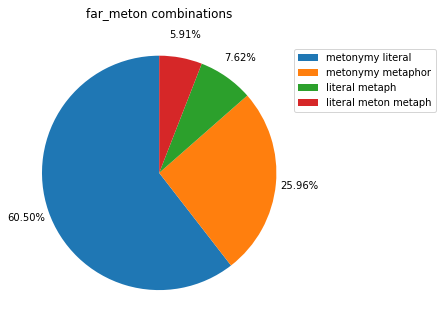

In [73]:
plt.pie(
    fm_summary['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.2, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(fm_summary['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('far_meton combinations', fontsize=12, y=1.08)
plt.show()

In [74]:
pure = df[df.basket_type =="pure"]

In [75]:
close_meton3 = pure[pure.group=="close_meton"]
close_close_meton3 = pure[pure.group=="close_close_meton"]
close_far_meton3 = pure[pure.group=="close_far_meton"]
far_meton3 = pure[pure.group=="far_meton"]

In [78]:
close_meton3 = df_manipulations(close_meton3)

In [79]:
close_meton3.head()

,participant,cs,word,contexts,labels,basket_length,basket_set
7,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,"[40, 39]","[literal, literal]",2,literal
8,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,"[42, 43]","[metaphor, metaphor]",2,metaphor
9,277a058c-6372-4840-8b1d-2ac2bac3d5e1,6,строгий,"[41, 44]","[metonymy, metonymy]",2,metonymy
36,98f0eb92-84a5-4a90-91e7-19d5ce1f7c69,1,злой,"[1, 4, 7]","[metonymy, metonymy, metonymy]",3,metonymy
39,98f0eb92-84a5-4a90-91e7-19d5ce1f7c69,1,злой,"[3, 6]","[literal, literal]",2,literal


In [81]:
cm_count3 = close_meton3.basket_set.groupby(close_meton3.basket_set).count()

In [82]:
cm_count3

basket_set
literal      954
metaphor    1663
metonymy     697
Name: basket_set, dtype: int64

In [83]:
cm3 = pd.DataFrame(cm_count3)
cm3['names'] = cm3.index

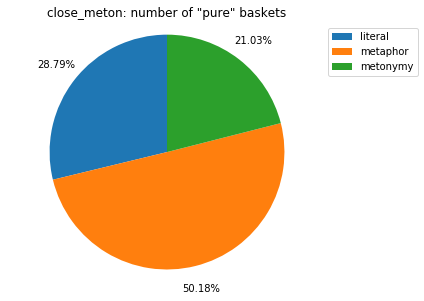

In [85]:
plt.pie(
    cm3['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.2, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(cm3['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_meton: number of "pure" baskets', fontsize=12)
plt.show()

In [87]:
close_close_meton3 = df_manipulations(close_close_meton3)
ccm_count3 = close_close_meton3.basket_set.groupby(close_close_meton3.basket_set).count()
ccm3 = pd.DataFrame(ccm_count3)
ccm3['names'] = ccm3.index

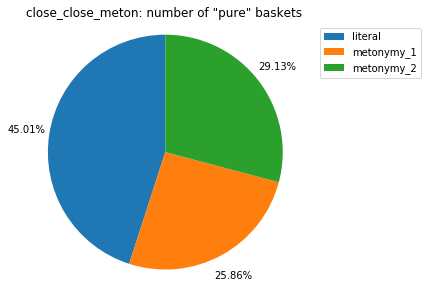

In [88]:
plt.pie(
    ccm3['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.2, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(ccm3['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_close_meton: number of "pure" baskets', fontsize=12)
plt.show()

In [89]:
close_far_meton3 = df_manipulations(close_far_meton3)
cfm_count3 = close_far_meton3.basket_set.groupby(close_far_meton3.basket_set).count()
cfm3 = pd.DataFrame(cfm_count3)
cfm3['names'] = cfm3.index

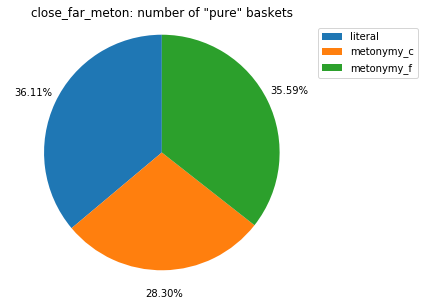

In [90]:
plt.pie(
    cfm3['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.2, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(cfm3['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('close_far_meton: number of "pure" baskets', fontsize=12)
plt.show()

In [91]:
far_meton3 = df_manipulations(far_meton3)
fm_count3 = far_meton3.basket_set.groupby(far_meton3.basket_set).count()
fm3 = pd.DataFrame(fm_count3)
fm3['names'] = fm3.index

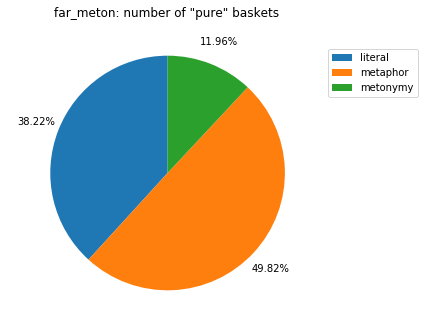

In [94]:
plt.pie(
    fm3['basket_set'],
    shadow=False,
    startangle=90,
    autopct='%1.2f%%',
    pctdistance=1.2, #labeldistance=1.2
)
plt.axis('equal')
plt.legend(fm3['names'],bbox_to_anchor=(1,1))
plt.tight_layout()
plt.title('far_meton: number of "pure" baskets', fontsize=12,y=1.08)
plt.show()